<a href="https://colab.research.google.com/github/anubhavgupta1/DeepLearning/blob/master/3_Sigmoid_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Plotting sigmoid

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

In [0]:
def sigmoid(w,x,b):
    return 1/(1+np.exp(-(w*x+b)))

In [613]:
sigmoid(1,0.5,0)

0.6224593312018546

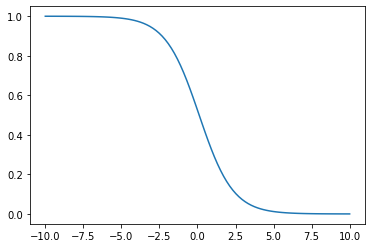

In [614]:
w = -0.9       #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = 0.1        #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)
plt.plot(X,Y)
plt.show()

In [0]:
def sigmoid_2d(x1,x2,w1,w2,b):
   return 1/(1+np.exp(-(w1*x1+w2*x2+b)))


In [616]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [0]:
from mpl_toolkits import mplot3d

In [618]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)
XX1, XX2 = np.meshgrid(X1, X2)
print(X1.shape,"\n",X2.shape,"\n",XX1.shape,"\n",XX2.shape)

(100,) 
 (100,) 
 (100, 100) 
 (100, 100)


In [0]:
W1 = 0.5
W2 = 0.5
b = 0
Y = sigmoid_2d(XX1,XX2,W1,W2,b)

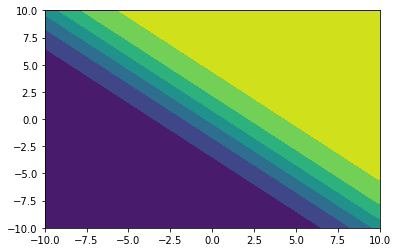

In [620]:
plt.contourf(XX1,XX2,Y)
plt.show()

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

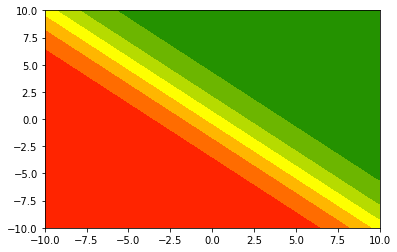

In [622]:
plt.contourf(XX1,XX2,Y,cmap=my_cmap)
plt.show()

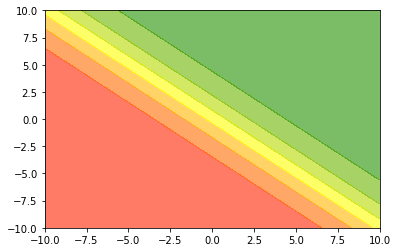

In [623]:
plt.contourf(XX1,XX2,Y,cmap=my_cmap, alpha = 0.6)
plt.show()

Text(0.5, 0, 'y')

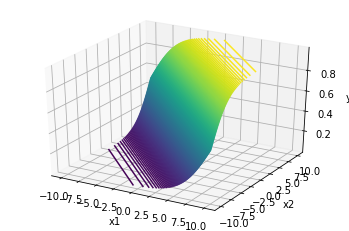

In [624]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(XX1, XX2, Y, 200,cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

Text(0.5, 0, 'y')

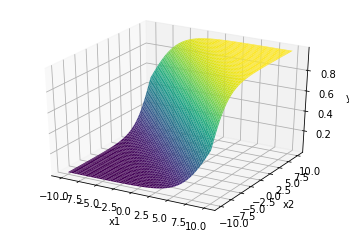

In [625]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')


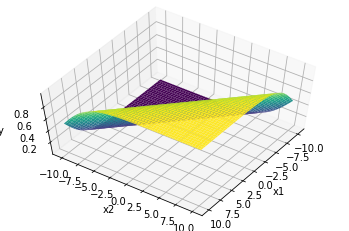

In [626]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(60,35)

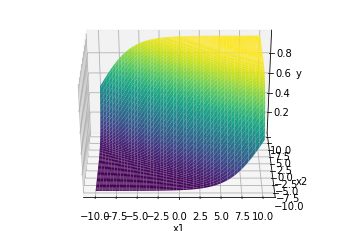

In [627]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(30,270)

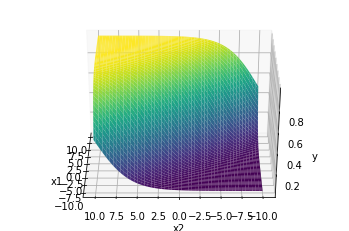

In [628]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(30,180)

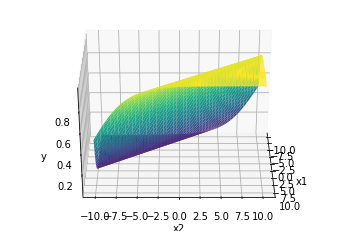

In [629]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(30,0)

If one of the weight becomes significant larger : 

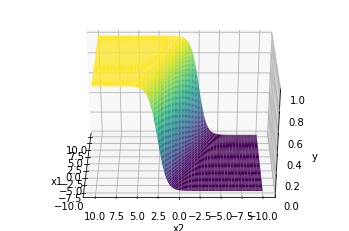

In [630]:
W1 = 0.5
W2 = 2
b = 0
Y = sigmoid_2d(XX1,XX2,W1,W2,b)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(30,180)

#Compute Loss for a given dataset

In [0]:
w_uk = 0.5
b_uk = 0.5
X = np.random.random(25) * 20 - 10
Y = sigmoid(w_uk,X,b_uk)


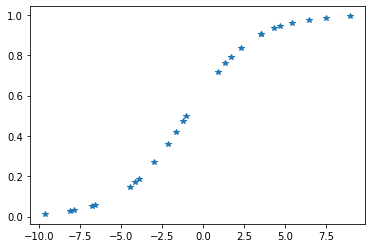

In [632]:
plt.plot(X,Y,'*')
plt.show()

In [0]:
def calculate_loss(X,Y,w_est,b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y-sigmoid(w_est,x,b_est))**2
  return loss


In [634]:
W = np.linspace(-1,1,100)
B = np.linspace(-1,1,100)
WW, BB = np.meshgrid(W,B)
Loss = np.zeros(WW.shape)

WW.shape


(100, 100)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = calculate_loss(X,Y,WW[i,j],BB[i,j])


Text(0.5, 0, 'Loss')

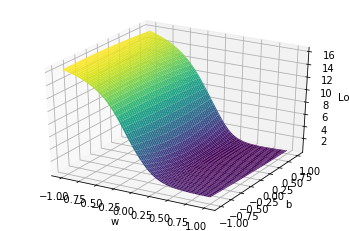

In [636]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
#ax.view_init(30,270)

#When w<0, Loss is High

Text(0.5, 0, 'Loss')

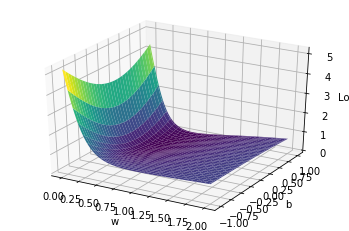

In [637]:
W = np.linspace(0,2,101)
B = np.linspace(-1,1,101)
WW, BB = np.meshgrid(W,B)
Loss = np.zeros(WW.shape)

WW.shape


for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = calculate_loss(X,Y,WW[i,j],BB[i,j])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
#ax.view_init(30,270)

In [638]:
ij = np.argmin(Loss)
i = int(np.floor(ij /Loss.shape[1]))
j = int(ij - i * Loss.shape[1])
print(i,",",j)

75 , 25


In [639]:
print(WW[i,j],",",BB[i,j],",",Loss[i,j])

0.5 , 0.5 , 0.0


# Class for Sigmoid Neuron

In [0]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [641]:
X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y = [1,1,1,0,0,0]
X.shape

(6, 2)

In [0]:
epochs = 1
learning_rate = 0.25

In [643]:
sn = SigmoidNeuron()
sn.fit(X,Y,epochs,learning_rate,True)
print(sn.w,",",sn.b)


[[ 3.36976923 -0.31612345]] , [-0.01898291]


In [0]:
def plot_sn(X,Y,sn,ax):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1, XX2 = np.meshgrid(X1,X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i,j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1,XX2,YY,cmap=my_cmap,alpha=0.6)
  ax.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
  ax.plot()




#10 epochs


[[0.10478013 0.81345576]] , [0.00697564]



[[0.37034717 0.68056451]] , [0.01331336]



[[0.53269138 0.53431616]] , [0.01644593]



[[0.62309348 0.35284077]] , [0.02852816]



[[0.68144086 0.11411427]] , [0.04310285]



[[ 0.70714215 -0.13849397]] , [0.03214803]



[[ 0.7428002  -0.25522983]] , [-0.00101097]



[[ 0.80174253 -0.2665113 ]] , [-0.03160906]



[[ 0.8522655 -0.2832338]] , [-0.06102491]



[[ 0.89835403 -0.29793729]] , [-0.08905065]


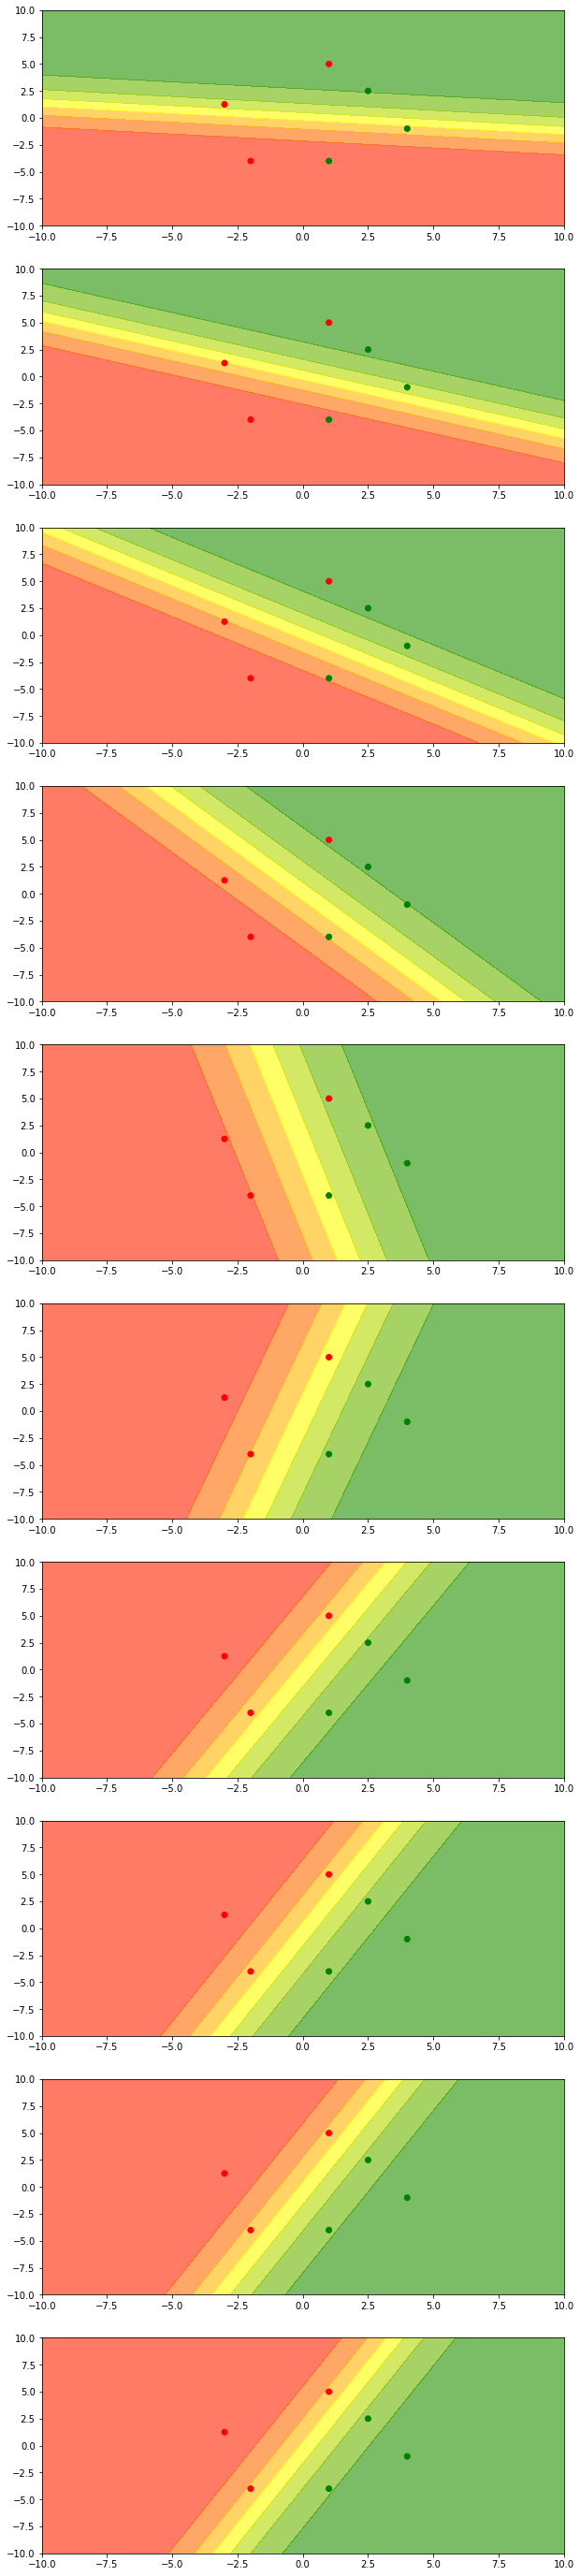

In [645]:
sn.fit(X,Y,epochs,learning_rate,True)
N = 10
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,",",sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,epochs,learning_rate,False)
  



[[ 1.56481974 -0.60764657]] , [-0.07135277]



[[ 1.62980752 -0.52615161]] , [-0.11449836]



[[ 1.64990255 -0.56197344]] , [-0.15384577]



[[ 1.67927295 -0.5638044 ]] , [-0.18934541]



[[ 1.70419709 -0.57307602]] , [-0.22238262]



[[ 1.72809654 -0.58046866]] , [-0.25309521]



[[ 1.75059414 -0.58761129]] , [-0.28177497]



[[ 1.77189417 -0.59435951]] , [-0.3086389]



[[ 1.79211194 -0.60076441]] , [-0.33387674]



[[ 1.81135112 -0.60685821]] , [-0.35765172]


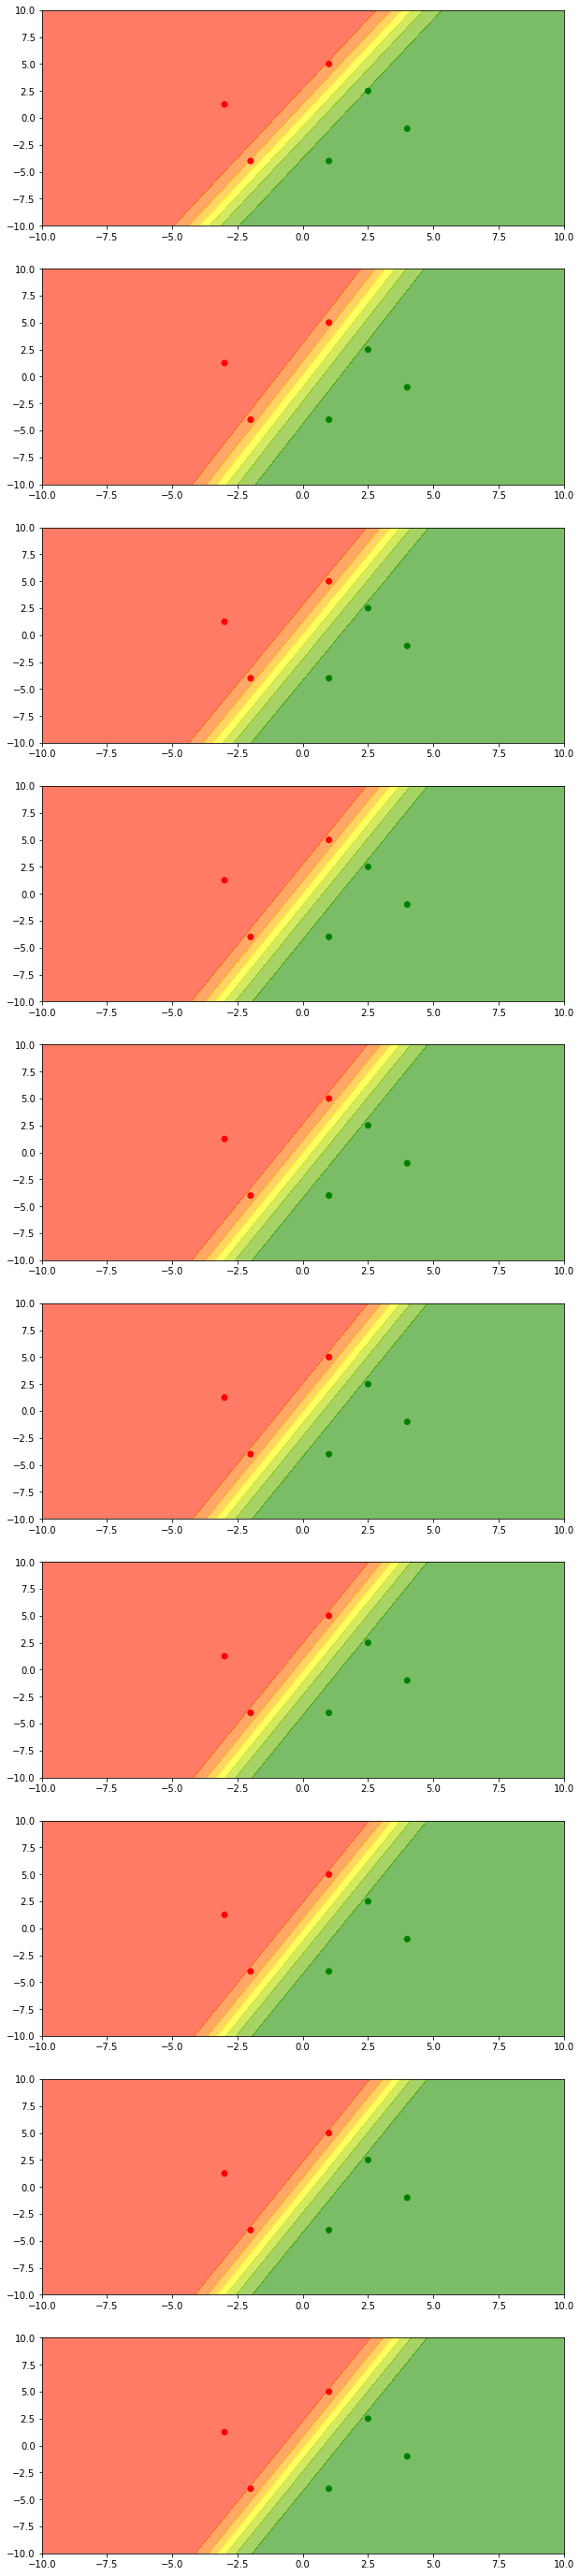

In [646]:
learning_rate = 0.5
sn.fit(X,Y,epochs,learning_rate,True)
N = 10
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,",",sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,epochs,learning_rate,False)
  


[[ 0.42479714 -0.35916658]] , [0.02865863]



[[ 0.75523786 -0.05661759]] , [-0.0035696]



[[ 0.78410838 -0.43763018]] , [-0.06072265]



[[ 0.99217806 -0.17557638]] , [-0.10608517]



[[ 0.9930806  -0.45681888]] , [-0.16636237]



[[ 1.13718286 -0.28020011]] , [-0.20876467]



[[ 1.14874763 -0.44701598]] , [-0.25810418]



[[ 1.23697684 -0.36821146]] , [-0.29383286]



[[ 1.26592555 -0.43784783]] , [-0.33108144]



[[ 1.31871872 -0.42536659]] , [-0.36193043]



[[ 1.35486904 -0.44889217]] , [-0.39171569]



[[ 1.39312667 -0.45729594]] , [-0.41873396]



[[ 1.42728281 -0.46937305]] , [-0.44404924]



[[ 1.45963628 -0.47961148]] , [-0.4676356]



[[ 1.48996184 -0.48943828]] , [-0.48973608]



[[ 1.51856064 -0.49867331]] , [-0.51049661]



[[ 1.54560114 -0.5074082 ]] , [-0.5300543]



[[ 1.57123864 -0.51568998]] , [-0.54852646]



[[ 1.59560605 -0.52356178]] , [-0.56601532]



[[ 1.61881869 -0.53106091]] , [-0.58261023]


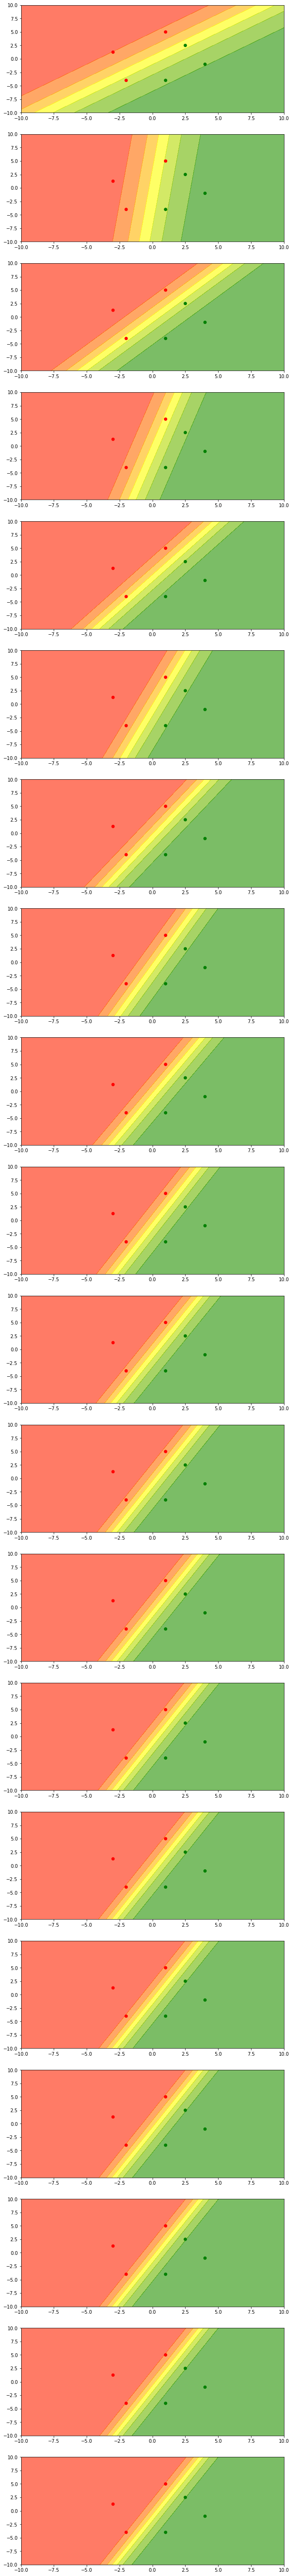

In [647]:
learning_rate = 0.5
sn.fit(X,Y,epochs,learning_rate,True)
N = 20
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,",",sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,epochs,learning_rate,False)


[[0.81681248 0.25603693]] , [0.03030392]



[[ 0.89725942 -0.45957017]] , [0.06086497]



[[ 1.15663548 -0.1231527 ]] , [-0.02895114]



[[ 1.09845954 -0.68457142]] , [-0.13051155]



[[ 1.42219684 -0.16475493]] , [-0.19828796]



[[ 1.34012777 -0.72564437]] , [-0.29799147]



[[ 1.59063771 -0.31012098]] , [-0.36186854]



[[ 1.53477923 -0.68297996]] , [-0.43792643]



[[ 1.67006104 -0.46924703]] , [-0.47880213]



[[ 1.66896616 -0.58774193]] , [-0.51661829]



[[ 1.71415592 -0.55800144]] , [-0.54265498]



[[ 1.73931253 -0.57662853]] , [-0.56806686]



[[ 1.76679168 -0.5834069 ]] , [-0.59119767]



[[ 1.79207581 -0.59170947]] , [-0.61287159]



[[ 1.81611406 -0.59935752]] , [-0.63316728]



[[ 1.83894845 -0.60664064]] , [-0.65224454]



[[ 1.86069702 -0.61357893]] , [-0.67022928]



[[ 1.88145713 -0.62020364]] , [-0.68723022]



[[ 1.90131379 -0.6265418 ]] , [-0.70334128]



[[ 1.9203416  -0.63261708]] , [-0.71864405]


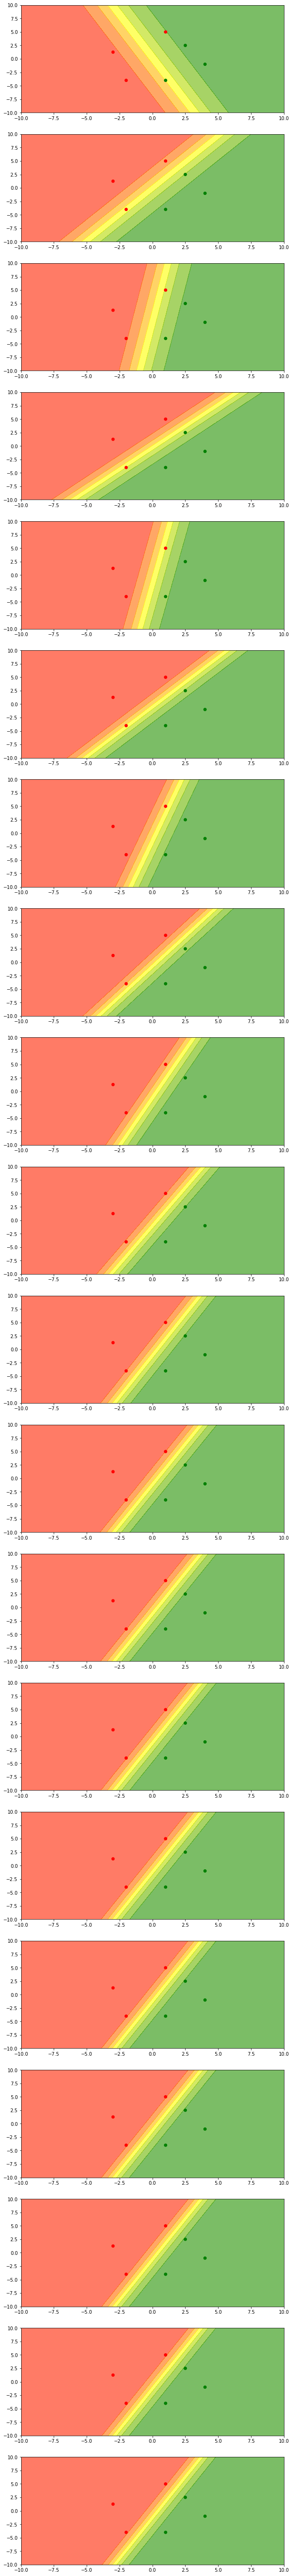

In [648]:
learning_rate = 0.75
sn.fit(X,Y,epochs,learning_rate,True)
N = 20
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,",",sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,epochs,learning_rate,False)


[[ 1.12557029 -0.50210242]] , [-0.07034052]



[[ 1.25016095 -0.33797676]] , [-0.12169811]



[[ 1.26077054 -0.47207505]] , [-0.17498523]



[[ 1.33088159 -0.41674213]] , [-0.21674499]



[[ 1.35974977 -0.46516352]] , [-0.25727388]



[[ 1.40307543 -0.46173189]] , [-0.29256831]



[[ 1.43628018 -0.47852453]] , [-0.32563148]



[[ 1.46968522 -0.48735219]] , [-0.35591397]



[[ 1.50032153 -0.49755112]] , [-0.38405719]



[[ 1.52929012 -0.50672367]] , [-0.41023335]



[[ 1.55660287 -0.51545065]] , [-0.43468249]



[[ 1.58245507 -0.52370306]] , [-0.45758972]



[[ 1.6069865  -0.53153536]] , [-0.47911669]



[[ 1.63032098 -0.53898636]] , [-0.49940237]



[[ 1.65256603 -0.54609033]] , [-0.51856715]



[[ 1.67381569 -0.55287728]] , [-0.53671581]



[[ 1.69415263 -0.55937356]] , [-0.55393998]



[[ 1.71364986 -0.56560246]] , [-0.57032013]



[[ 1.73237216 -0.57158463]] , [-0.58592729]



[[ 1.75037723 -0.57733847]] , [-0.60082434]



[[ 1.7677167  -0.58288046]] , [-0.6150672]



[[ 1.78443689 -0.58822536]] , [-0.62870579]



[[ 1.80057955 -0.59338647]] , [-0.64178479]



[[ 1.81618241 -0.59837582]] , [-0.65434435]



[[ 1.83127967 -0.60320431]] , [-0.66642067]



[[ 1.84590242 -0.60788185]] , [-0.67804645]



[[ 1.86007903 -0.61241747]] , [-0.68925134]



[[ 1.8738354  -0.61681942]] , [-0.70006228]



[[ 1.88719529 -0.62109526]] , [-0.71050384]



[[ 1.90018052 -0.62525195]] , [-0.72059843]


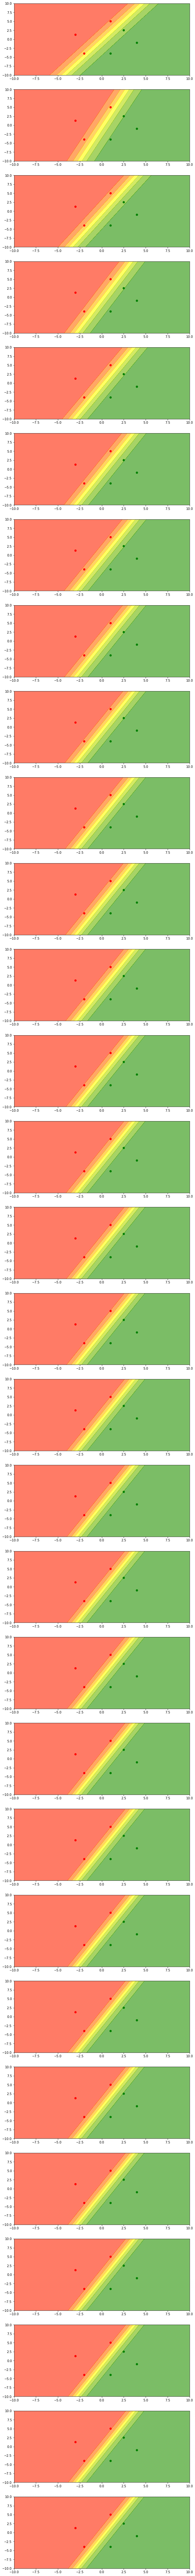

In [649]:
learning_rate = 0.5
sn.fit(X,Y,epochs,learning_rate,True)
N = 30
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,",",sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,epochs,learning_rate,False)


[[ 2.90386285 -1.27784838]] , [-0.07263696]



[[ 2.97242771 -1.14224159]] , [-0.10711633]



[[ 2.99904915 -1.09343047]] , [-0.12241979]



[[ 3.01566575 -1.06710043]] , [-0.13402047]



[[ 3.02767277 -1.05183647]] , [-0.14426677]



[[ 3.03712359 -1.04294519]] , [-0.15387908]



[[ 3.04503195 -1.03792824]] , [-0.16312282]



[[ 3.0519607  -1.03531716]] , [-0.17210484]



[[ 3.05824133 -1.03421451]] , [-0.18087188]



[[ 3.06407585 -1.03406237]] , [-0.18944688]



[[ 3.06959029 -1.0345105 ]] , [-0.19784312]



[[ 3.07486487 -1.03533735]] , [-0.20606977]



[[ 3.07995168 -1.03640179]] , [-0.2141341]



[[ 3.08488524 -1.03761332]] , [-0.22204247]



[[ 3.08968894 -1.03891351]] , [-0.22980067]



[[ 3.09437907 -1.04026446]] , [-0.23741409]



[[ 3.0989673  -1.04164146]] , [-0.24488783]



[[ 3.10346226 -1.04302835]] , [-0.25222672]



[[ 3.10787052 -1.04441459]] , [-0.25943534]



[[ 3.11219731 -1.04579327]] , [-0.26651804]



[[ 3.11644688 -1.04715996]] , [-0.27347898]



[[ 3.12062282 -1.04851181]] , [-0.2803221]



[[ 3.12472822 -1.04984709]] , [-0.28705119]



[[ 3.12876583 -1.05116476]] , [-0.29366983]



[[ 3.13273811 -1.0524643 ]] , [-0.30018145]



[[ 3.13664732 -1.05374549]] , [-0.30658934]



[[ 3.14049554 -1.05500836]] , [-0.31289662]



[[ 3.14428472 -1.05625306]] , [-0.31910629]



[[ 3.14801669 -1.05747985]] , [-0.32522122]



[[ 3.15169315 -1.05868905]] , [-0.33124415]


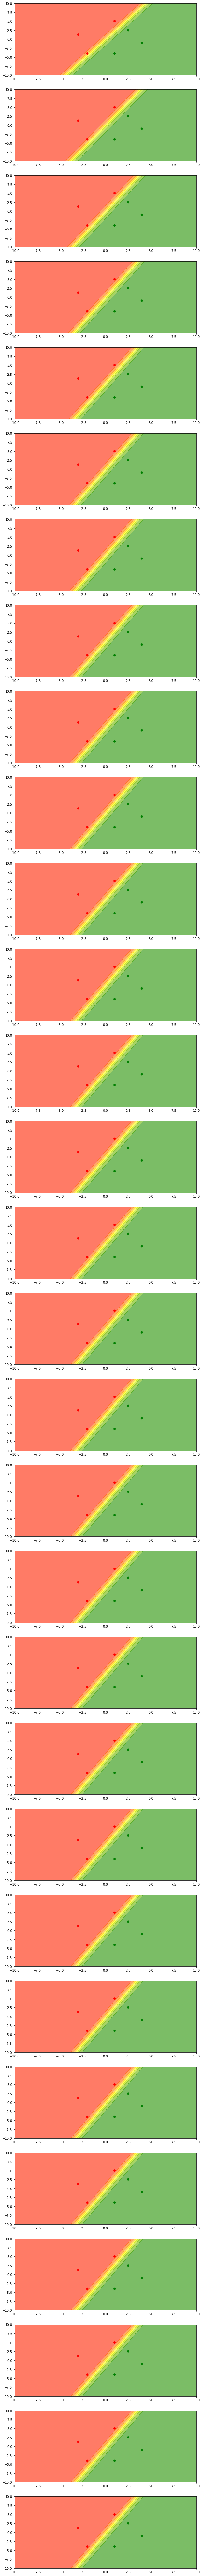

In [650]:
learning_rate = 0.5
sn.fit(X,Y,epochs,learning_rate,True)
N = 30
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,",",sn.b)
  ax = plt.subplot(N+1,1,i+2)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,epochs,learning_rate,False)


[[-0.33652075  0.74081956]] , [0.00187649]



[[0.05655655 0.57344833]] , [0.02072645]



[[0.61387814 0.1805391 ]] , [0.04371536]



[[ 0.69984082 -0.34855109]] , [0.03897267]



[[ 0.88946271 -0.17736273]] , [-0.01865143]



[[ 0.91487755 -0.41965463]] , [-0.08412773]



[[ 1.06444236 -0.25277732]] , [-0.13330487]



[[ 1.07882202 -0.43912606]] , [-0.18928271]



[[ 1.18419544 -0.33466166]] , [-0.23064382]



[[ 1.20903703 -0.43575506]] , [-0.27451792]



[[ 1.2748126  -0.40162668]] , [-0.30936244]



[[ 1.30986458 -0.44056791]] , [-0.34369601]



[[ 1.35386592 -0.44294248]] , [-0.37388922]



[[ 1.38985958 -0.45866044]] , [-0.40234156]



[[ 1.42498045 -0.46882502]] , [-0.42856967]



[[ 1.45741568 -0.47953809]] , [-0.45306378]



[[ 1.48796748 -0.4893495 ]] , [-0.47595724]



[[ 1.51674392 -0.49863392]] , [-0.497434]



[[ 1.54394459 -0.50740583]] , [-0.51763859]



[[ 1.56972494 -0.51572034]] , [-0.53669782]



[[ 1.59422033 -0.52362087]] , [-0.55472155]



[[ 1.61754802 -0.53114529]] , [-0.57180557]



[[ 1.6398103  -0.53832659]] , [-0.58803379]



[[ 1.66109688 -0.54519372]] , [-0.60348]



[[ 1.68148684 -0.55177221]] , [-0.61820937]



[[ 1.70105022 -0.55808462]] , [-0.6322797]



[[ 1.71984932 -0.56415107]] , [-0.64574242]



[[ 1.73793981 -0.56998948]] , [-0.65864348]



[[ 1.75537159 -0.57561594]] , [-0.67102405]



[[ 1.77218957 -0.58104493]] , [-0.68292113]


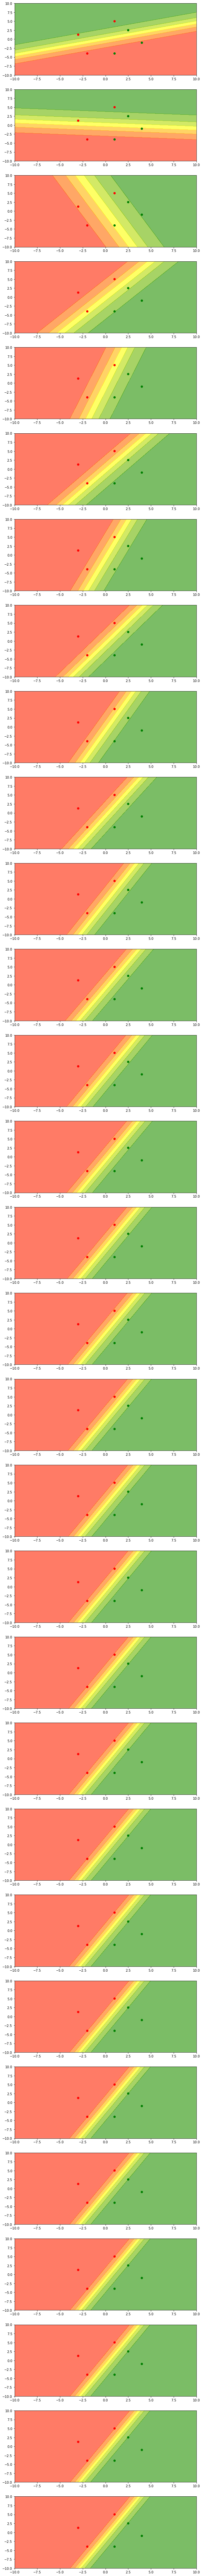

In [651]:
learning_rate = 0.5
sn.fit(X,Y,epochs,0.05,True)
N = 30
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,",",sn.b)
  ax = plt.subplot(N+1,1,i+2)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,epochs,learning_rate,False)

In [652]:
!ls

mobile_cleaned.csv  sample_data


# Section 1 : Loading Data

In [653]:

data = pd.read_csv('mobile_cleaned.csv')
data.head()

PhoneId  Pixel Density  Screen Size  ...  Sim1_3G  Sim1_4G  Rating
0        0            403         6.26  ...        0        1     4.5
1        1            271         6.20  ...        0        1     4.5
2        2            409         6.30  ...        0        1     4.4
3        4            411         6.00  ...        0        1     4.3
4        5            396         6.50  ...        0        1     4.4

[5 rows x 88 columns]

In [654]:
data.shape

(341, 88)

In [655]:
Xd  = data.drop(['Rating'], axis = 1)
Y = data['Rating'].values
Xd.head()


PhoneId  Pixel Density  Screen Size  ...  Sim1_2G  Sim1_3G  Sim1_4G
0        0            403         6.26  ...        0        0        1
1        1            271         6.20  ...        0        0        1
2        2            409         6.30  ...        0        0        1
3        4            411         6.00  ...        0        0        1
4        5            396         6.50  ...        0        0        1

[5 rows x 87 columns]

In [656]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [657]:
# binarisation of Rating
threshold = 4
data['Class'] = (data['Rating'] >= threshold).astype(np.int)
data['Class']

0      1
1      1
2      1
3      1
4      1
      ..
336    0
337    0
338    1
339    0
340    1
Name: Class, Length: 341, dtype: int64

In [658]:
Xd  = data.drop(['Rating','Class'], axis = 1)
Y = data['Rating'].values
Xd.head()

PhoneId  Pixel Density  Screen Size  ...  Sim1_2G  Sim1_3G  Sim1_4G
0        0            403         6.26  ...        0        0        1
1        1            271         6.20  ...        0        0        1
2        2            409         6.30  ...        0        0        1
3        4            411         6.00  ...        0        0        1
4        5            396         6.50  ...        0        0        1

[5 rows x 87 columns]

In [659]:
data['Class'].value_counts(normalize = True)

1    0.697947
0    0.302053
Name: Class, dtype: float64

In [660]:
# binarisation of Rating
threshold = 4.1
data['Class'] = (data['Rating'] >= threshold).astype(np.int)
data['Class'].value_counts(normalize = True)

1    0.58651
0    0.41349
Name: Class, dtype: float64

In [661]:
# binarisation of Rating
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(np.int)
data['Class'].value_counts(normalize = True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [662]:
Y_binarised = data['Class'].values
Y_binarised

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

# Section 2 : Standardisation
# z = (x - u) / s ;  u is mean here and s is standard deviation
# mean should be zero and standard deviation should be 1 

In [663]:
R = np.random.random([100,1])
R

array([[8.14828457e-01],
       [7.45890403e-01],
       [4.12084868e-02],
       [1.18554141e-01],
       [6.74707033e-01],
       [1.16728460e-01],
       [9.16006672e-01],
       [4.15421040e-01],
       [3.42671701e-01],
       [2.85459986e-01],
       [2.06471315e-01],
       [9.62763306e-01],
       [2.02354610e-01],
       [3.95325729e-01],
       [8.84880405e-01],
       [1.63913953e-01],
       [2.03500566e-02],
       [7.35770702e-01],
       [7.07897851e-01],
       [8.78200688e-02],
       [2.78992792e-01],
       [1.07449777e-01],
       [5.10439903e-01],
       [7.52509194e-02],
       [4.62801775e-01],
       [6.76803649e-01],
       [3.01995470e-01],
       [5.90246514e-01],
       [5.17494734e-01],
       [7.68929675e-02],
       [8.33690101e-01],
       [1.29766651e-01],
       [5.13243810e-01],
       [7.19164001e-01],
       [6.46282307e-02],
       [3.33050486e-01],
       [7.65565891e-01],
       [2.95208663e-01],
       [7.31846396e-01],
       [5.92444185e-01],


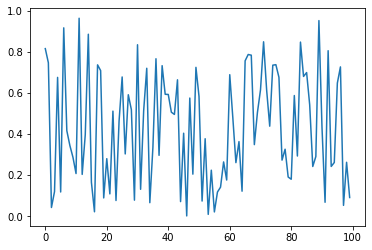

In [664]:
plt.plot(R)
plt.show()

In [665]:
np.mean(R)

0.4303294821753411

In [666]:
np.std(R)

0.2704699910433753

In [667]:
scaler = StandardScaler()
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [668]:
scaler.mean_

array([0.43032948])

In [669]:
RT = scaler.transform(R)
np.mean(RT)

2.2648549702353194e-16

In [670]:
np.std(RT)

1.0

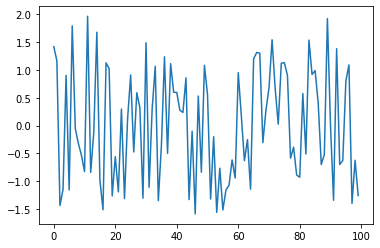

In [671]:
plt.plot(RT)
plt.show()

In [672]:
X_train , X_test , Y_train , Y_test = train_test_split(Xd,Y,random_state = 1, stratify = Y_binarised)
print("X = ",Xd.shape,"\n","X_train = ",X_train.shape,"\n","X_test =",X_test.shape) 

X =  (341, 87) 
 X_train =  (255, 87) 
 X_test = (86, 87)


In [0]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [0]:
minmax_scaler = MinMaxScaler()
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1,1))
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1,1))

In [675]:
np.max(Y_scaled_train)

1.0

In [676]:
np.min(Y_scaled_train)

0.0

In [677]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(1,-1)))[0][0]
scaled_threshold 

0.6800000000000002

#We need to binarize the ground truth before before using it for training or calculating accuracy because we are doing classification of whether or not to buy a phone , where the classes are either 0 or 1.

In [0]:
Y_binarised_train = (Y_scaled_train >= scaled_threshold).astype(np.int).ravel()
Y_binarised_test = (Y_scaled_test >= scaled_threshold).astype("int").ravel()

  #Train on Real Data

TypeError: ignored

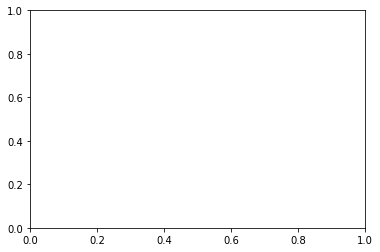

In [679]:
sn = SigmoidNeuron()
sn.fit(X_scaled_train, Y_scaled_train, epochs=10, learning_rate=0.2, display_loss=True)

In [0]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [0]:
Y_pred_binarised_train = (Y_pred_train >= scaled_threshold).astype(np.int).ravel()
Y_pred_binarised_test = (Y_pred_test >= scaled_threshold).astype("int").ravel()

In [0]:
accuracy_train = accuracy_score(Y_pred_binarised_train,Y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test,Y_binarised_test)

In [0]:
accuracy_train

In [0]:
accuracy_test

In [0]:
epochs = 1000
learning_rate = 0.2
sn = SigmoidNeuron()
sn.fit(X_scaled_train,Y_scaled_train,epochs,learning_rate)
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)
Y_pred_binarised_train = (Y_pred_train >= scaled_threshold).astype(np.int).ravel()
Y_pred_binarised_test = (Y_pred_test >= scaled_threshold).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train,Y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test,Y_binarised_test)
print("Train accuracy = ", accuracy_train,"\n","Test accuracy = ", accuracy_test)

In [0]:
epochs = 1000
learning_rate = 0.01
sn = SigmoidNeuron()
sn.fit(X_scaled_train,Y_scaled_train,epochs,learning_rate)
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)
Y_pred_binarised_train = (Y_pred_train >= scaled_threshold).astype(np.int).ravel()
Y_pred_binarised_test = (Y_pred_test >= scaled_threshold).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train,Y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test,Y_binarised_test)
print("Train accuracy = ", accuracy_train,"\n","Test accuracy = ", accuracy_test)

In [0]:
epochs = 5000
learning_rate = 0.01
sn = SigmoidNeuron()
sn.fit(X_scaled_train,Y_scaled_train,epochs,learning_rate)
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)
Y_pred_binarised_train = (Y_pred_train >= scaled_threshold).astype(np.int).ravel()
Y_pred_binarised_test = (Y_pred_test >= scaled_threshold).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train,Y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test,Y_binarised_test)
print("Train accuracy = ", accuracy_train,"\n","Test accuracy = ", accuracy_test)